Please read ths blog post, [Gender Equality in Singapore: The Gender Pay Gap & Labor Force Participation & Educational Attainment](https://medium.com/@luzhenna/gender-equality-in-singapore-the-gender-pay-gap-labor-force-participation-educational-875ba06e3042), for a detailed explanation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot') # 'fivethirtyeight') # 'tableau-colorblind10') #

In [3]:
PATH2DATA_WAGE_GENDER = './data/mrsd_2023Wages_table1.xlsx'
PATH2DATA_PAY_GAP = './data/M920131.csv'
PATH2DATA_LABOR_PARTICIPATION = './data/API_SL.TLF.CACT.FE.NE.ZS_DS2_en_csv_v2_1760.csv'
PATH2DATA_LABOR_SG = './data/M182201.csv'
PATH2DATA_EDUCATION = './data/SingaporeResidentsAged25YearsOverByHighestQualificationAttainedSexAndAgeGroupAnnual.csv'
PATH2DATA_UNI_INTAKE = './data/M850761.csv'

###Gender Wage Gap 2023

Data Source: Data Source: Manpower Research & Statistics Department, MOM (Ministry of Manpower)

[Link to download data](https://stats.mom.gov.sg/iMAS_Tables1/Wages/Wages_2023/mrsd_2023Wages_table1.xlsx).

In [4]:
def load_and_clean(path: str, sheet: int):
    """Load and clean the data from the given path and sheet."""
    # load one page of the excel worksheet
    df = pd.read_excel(path, sheet_name=sheet)
    # remove the empty header rows
    df = df.iloc[4:]
    # make first row as header
    df.columns = df.iloc[0]
    # drop the top 4 rows
    df = df.iloc[4:]
    # drop all columns after index 5 and first column
    df = df.iloc[:, 1:6]
    # drop rows with NaN
    df = df.dropna()
    return df

In [5]:
df_female = load_and_clean(PATH2DATA_WAGE_GENDER, 3)
df_male = load_and_clean(PATH2DATA_WAGE_GENDER, 2)
df_mixed = load_and_clean(PATH2DATA_WAGE_GENDER, 1)

In [30]:
# append 'Female' to column names
for col in df_female.columns:
  if col in ['Number Covered', 'Basic  Wage  ($)', 'Gross  Wage  ($)']:
    # change column name
    df_female.rename(columns={col: 'Female ' + col}, inplace=True)

In [31]:
# append 'Male' to column names
for col in df_male.columns:
  if col in ['Number Covered', 'Basic  Wage  ($)', 'Gross  Wage  ($)']:
    # change column name
    df_male.rename(columns={col: 'Male ' + col}, inplace=True)

In [32]:
# merge multiple dataframes
from functools import reduce

dfs = [df_mixed, df_female, df_male]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Occupation', 'SSOC 2020']), dfs)

df_merged.head()

4,SSOC 2020,Occupation,Number Covered,Basic Wage ($),Gross Wage ($),Female Number Covered,Female Basic Wage ($),Female Gross Wage ($),Male Number Covered,Male Basic Wage ($),Male Gross Wage ($)
0,12112,Administration manager,2796,5331,5600,1890,5103,5410,906,5699,5989
1,12221,Advertising/Public relations manager,434,9070,9796,307,8695,9150,127,10500,10823
2,12113,Audit manager,974,8661,8705,561,8800,8809,413,8500,8550
3,12111,Budgeting and financial accounting manager (in...,4493,8300,8500,3101,7884,8072,1392,9386,9500
4,12212,Business development manager,2891,8985,9300,1242,8416,8795,1649,9376,9750


In [33]:
# create a new column and calculate the ratio of 'Female Number Covered' over 'Number Covered'
df_merged['Female Ratio'] = df_merged['Female Number Covered'] / df_merged['Number Covered']

# rename columns
df_merged.rename(columns={
    'Female Basic  Wage  ($)': 'Female Basic Wage',
    'Male Basic  Wage  ($)': 'Male Basic Wage',
    'Female Gross  Wage  ($)': 'Female Gross Wage',
    'Male Gross  Wage  ($)': 'Male Gross Wage',
    'Gross  Wage  ($)': 'Gross Wage',
    'Basic  Wage  ($)': 'Basic Wage'
    }, inplace=True)

# create a new column for 'Difference in Gross Wage'
df_merged['Difference in Gross Wage'] = df_merged['Male Gross Wage'] - df_merged['Female Gross Wage']

# calculate gender wage gap
df_merged['Gender Wage Gap'] = (df_merged['Male Gross Wage'] - df_merged['Female Gross Wage'])/df_merged['Male Gross Wage']

# calculate gender wage ratio
df_merged['Wage Ratio M/F'] = df_merged['Male Gross Wage'] / df_merged['Female Gross Wage']
df_merged['Wage Ratio F/M'] = df_merged['Female Gross Wage'] / df_merged['Male Gross Wage']

df_merged.head()

4,SSOC 2020,Occupation,Number Covered,Basic Wage,Gross Wage,Female Number Covered,Female Basic Wage,Female Gross Wage,Male Number Covered,Male Basic Wage,Male Gross Wage,Female Ratio,Difference in Gross Wage,Gender Wage Gap,Wage Ratio M/F,Wage Ratio F/M
0,12112,Administration manager,2796,5331,5600,1890,5103,5410,906,5699,5989,0.675966,579,0.096677,1.107024,0.903323
1,12221,Advertising/Public relations manager,434,9070,9796,307,8695,9150,127,10500,10823,0.707373,1673,0.154578,1.182842,0.845422
2,12113,Audit manager,974,8661,8705,561,8800,8809,413,8500,8550,0.575975,-259,-0.030292,0.970598,1.030292
3,12111,Budgeting and financial accounting manager (in...,4493,8300,8500,3101,7884,8072,1392,9386,9500,0.690185,1428,0.150316,1.176908,0.849684
4,12212,Business development manager,2891,8985,9300,1242,8416,8795,1649,9376,9750,0.429609,955,0.097949,1.108584,0.902051


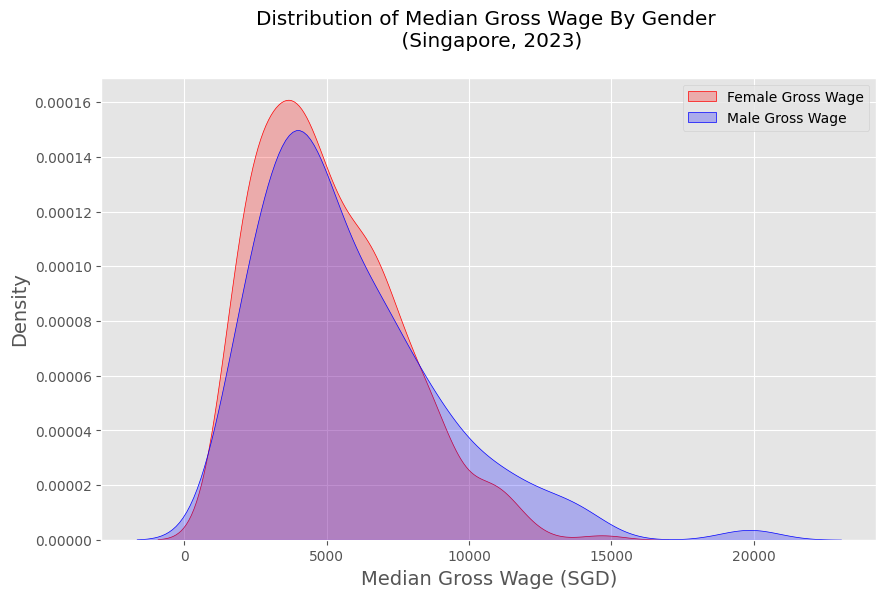

In [11]:
# set figure size
plt.figure(figsize=(10, 6))

sns.kdeplot(df_merged['Female Gross Wage'], fill=True, color="r")
sns.kdeplot(df_merged['Male Gross Wage'], fill=True, color="b")

# add legend
plt.legend(['Female Gross Wage', 'Male Gross Wage'])

# add label
plt.xlabel('Median Gross Wage (SGD)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# add a title
plt.title('Distribution of Median Gross Wage By Gender \n (Singapore, 2023)', y=1.05)

plt.show()

What is the average median gross wage for female and male in 2023?

In [75]:
df_merged['Female Gross Wage'].mean()

5050.141509433963

In [76]:
df_merged['Male Gross Wage'].mean()

5768.292452830188

In [77]:
df_merged['Gross Wage'].mean()

5338.575471698113

What is the average Gender Wage Gap Ratio of Singapore in 2023?

In [18]:
df_merged['Wage Ratio M/F'].mean()

1.1442359389073207

In [19]:
df_merged['Wage Ratio F/M'].mean()

0.9130651419265204

In [20]:
df_merged['Gender Wage Gap'].mean()

0.08693485807348007

Is there any correlation between Gender Wage Gap and Monthly Gross Wage?

In [44]:
# calculate the Pearson Correlation Coeffcient between 'Gross Wage' and 'Gender Wage Gap'
from scipy.stats import pearsonr

pearsonr(df_merged['Gross Wage'], df_merged['Gender Wage Gap'])

PearsonRResult(statistic=0.17991170004122276, pvalue=0.0012730756403702686)

Text(0.5, 1.05, 'Gender Wage Gap vs. Gross Wage Correlation \n (Singapore, 2023)')

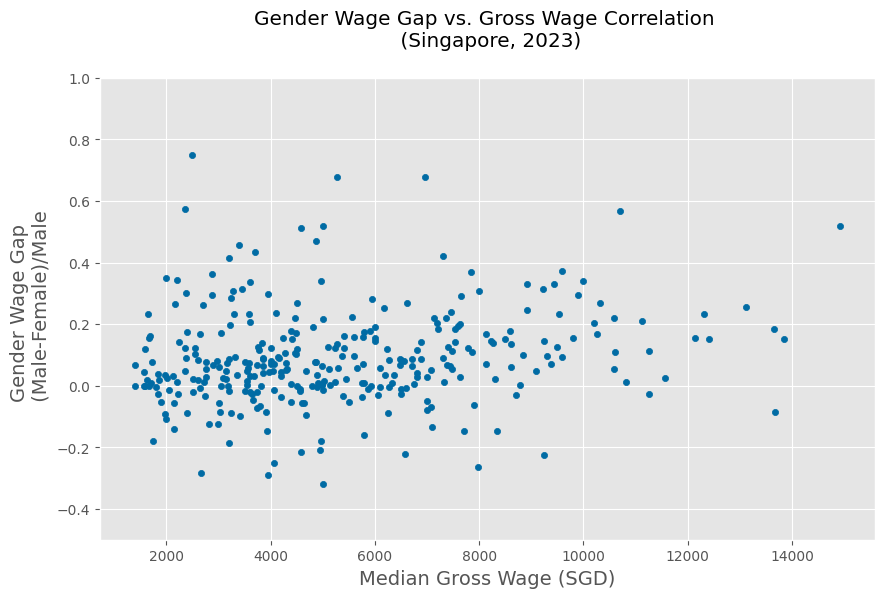

In [78]:
# plot a scatter plot of 'Gross Wage' vs. 'Gender Wage Ratio'
df_merged.plot(
    kind='scatter', x='Gross Wage', y='Gender Wage Gap', figsize=(10, 6))

# adjust ylim
plt.ylim(-0.5, 1)

# add labels
plt.xlabel('Median Gross Wage (SGD)', fontsize=14)
plt.ylabel('Gender Wage Gap \n (Male-Female)/Male', fontsize=14)

# add a title
plt.title('Gender Wage Gap vs. Gross Wage Correlation \n (Singapore, 2023)', y=1.05)

In [17]:
df_merged.sort_values(by='Female Ratio', ascending=False).head(20)[
    ['Occupation', 'Female Ratio', 'Female Number Covered', 'Male Number Covered']
]

4,Occupation,Female Ratio,Female Number Covered,Male Number Covered
195,Language instructor (extracurriculum),0.978983,1444,31
251,Secretary,0.959103,1454,62
158,Technical/Vocational/Commercial education inst...,0.941536,1385,86
277,Teacher aide,0.934505,585,41
250,Receptionist (general),0.915119,345,32
221,Tax associate professional,0.903302,383,41
259,Cashier (general),0.899194,669,75
245,Personnel/Human resource clerk,0.891429,312,38
47,Volunteer manager,0.890909,294,36
238,Library clerk,0.881844,306,41


Text(0.5, 1.05, 'Top 20 Female Dominated Occupations by Gender Imbalance \n (Singapore, 2023)')

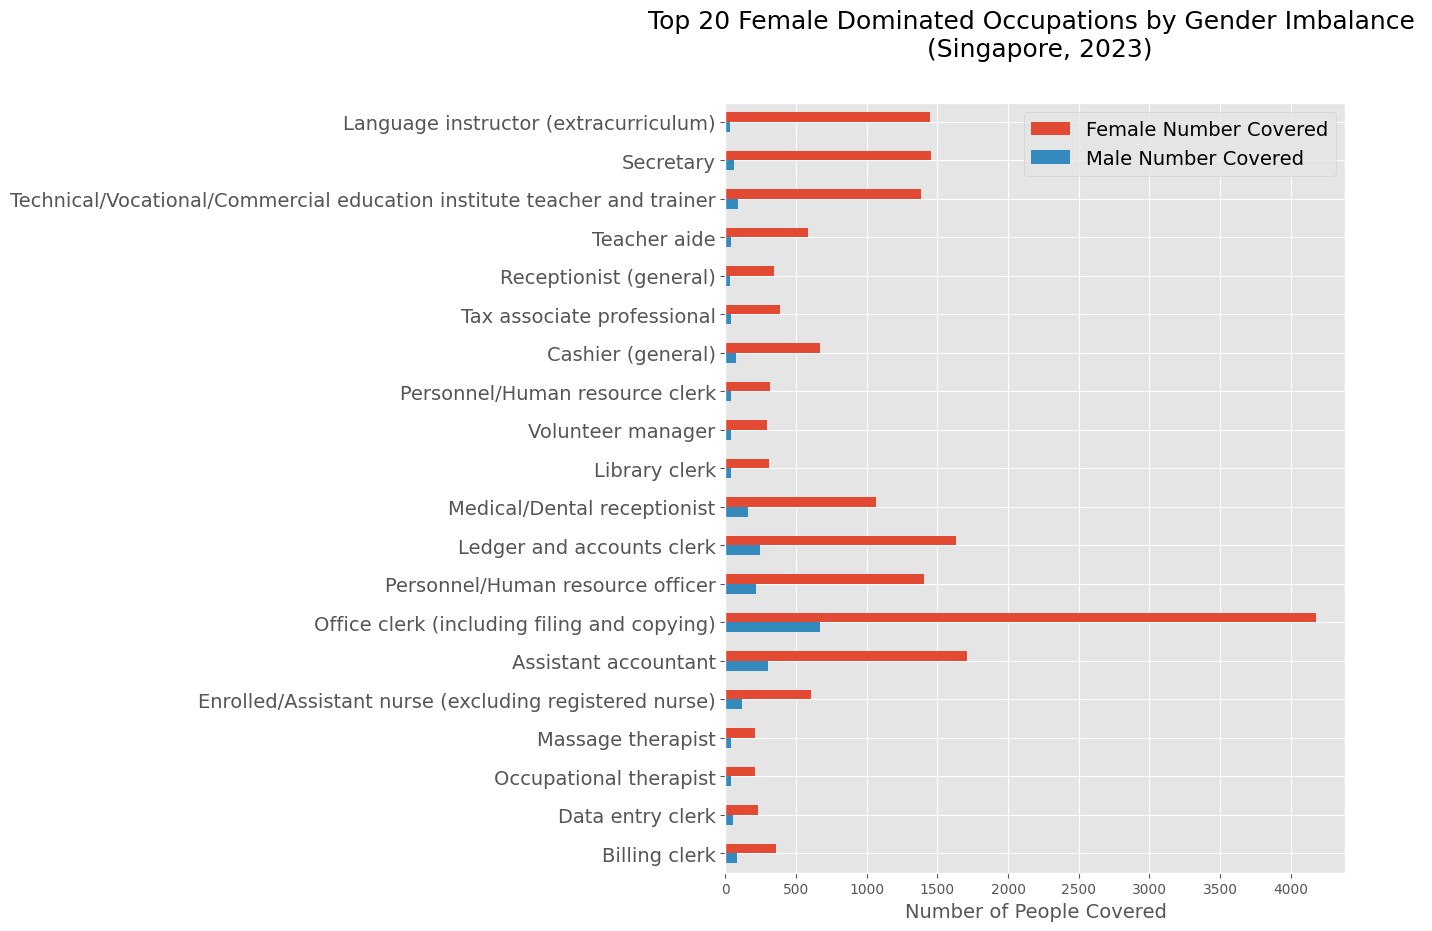

In [34]:
# plot a stacked horizontal bar chart of 'Male Number Covered' and 'Female Number Covered' by Occupation and show the top 20
df_merged.sort_values(by='Female Ratio', ascending=False).head(20).plot(
    kind='barh', x='Occupation', y=['Female Number Covered', 'Male Number Covered'], figsize=(8, 10))

# reverse y axis
plt.gca().invert_yaxis()

# move legends outside
plt.legend(loc='upper right', fontsize=14)

# increase y ticks fontsize
plt.yticks(fontsize=14)

# add labels
plt.xlabel('Number of People Covered', fontsize=14)
# plt.ylabel('Occupation', fontsize=14)

# remove y label
plt.ylabel('')

# add a title
plt.title('Top 20 Female Dominated Occupations by Gender Imbalance \n (Singapore, 2023)', y=1.05, fontsize=18)

Text(0.5, 1.05, 'Top 20 Male Dominated Occupations by Gender Imbalance \n (Singapore, 2023)')

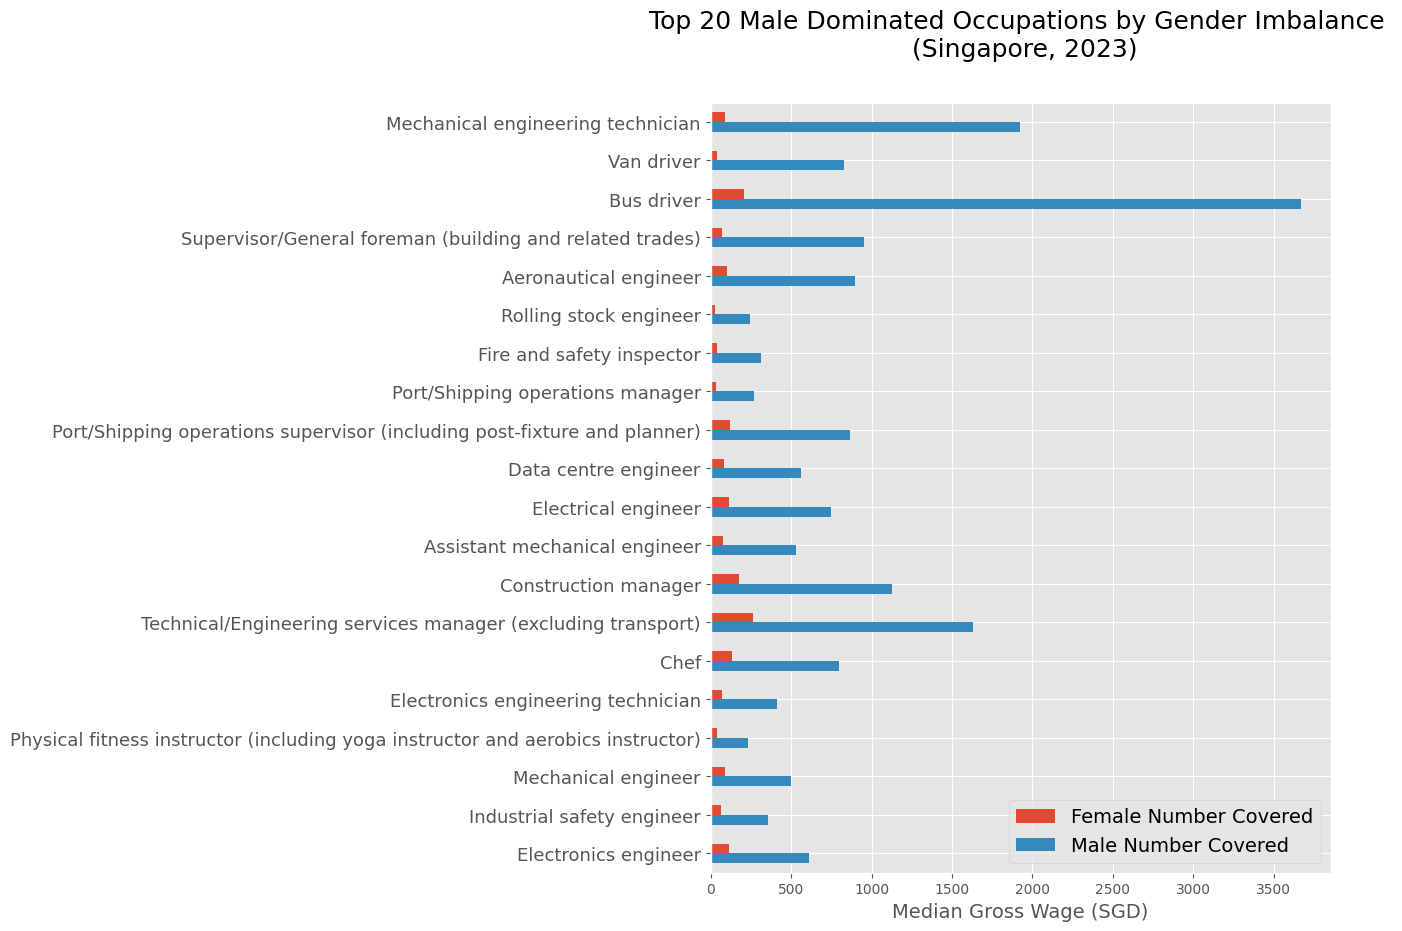

In [22]:
# plot a stacked horizontal bar chart of 'Male Number Covered' and 'Female Number Covered' by Occupation and show the top 20
df_merged.sort_values(by='Female Ratio', ascending=True).head(20).plot(
    kind='barh', x='Occupation', y=['Female Number Covered', 'Male Number Covered'], figsize=(8, 10))

# reverse y axis
plt.gca().invert_yaxis()

# move legends outside
plt.legend(loc='lower right', fontsize=14)

# add labels
plt.xlabel('Median Gross Wage (SGD)', fontsize=14)
# plt.ylabel('Occupation', fontsize=14)

# remove y label
plt.ylabel('')

# increase y ticks fontsize
plt.yticks(fontsize=13)

# add a title
plt.title('Top 20 Male Dominated Occupations by Gender Imbalance \n (Singapore, 2023)', y=1.05, fontsize=18)

What the average median gross wage for the male dominated occupations?

In [79]:
TOP_20_MALE_DOM = df_merged.sort_values(by='Female Ratio', ascending=True).head(20).Occupation.to_list()
df_merged[df_merged['Occupation'].isin(TOP_20_MALE_DOM)]['Gross Wage'].mean()

5232.25

In [80]:
TOP_20_FEMALE_DOM = df_merged.sort_values(by='Female Ratio', ascending=False).head(20).Occupation.to_list()
df_merged[df_merged['Occupation'].isin(TOP_20_FEMALE_DOM)]['Gross Wage'].mean()

3482.15

Text(0.5, 1.05, 'Top 20 High-Earning Occupations by Median Wage \n (Singapore, 2023)')

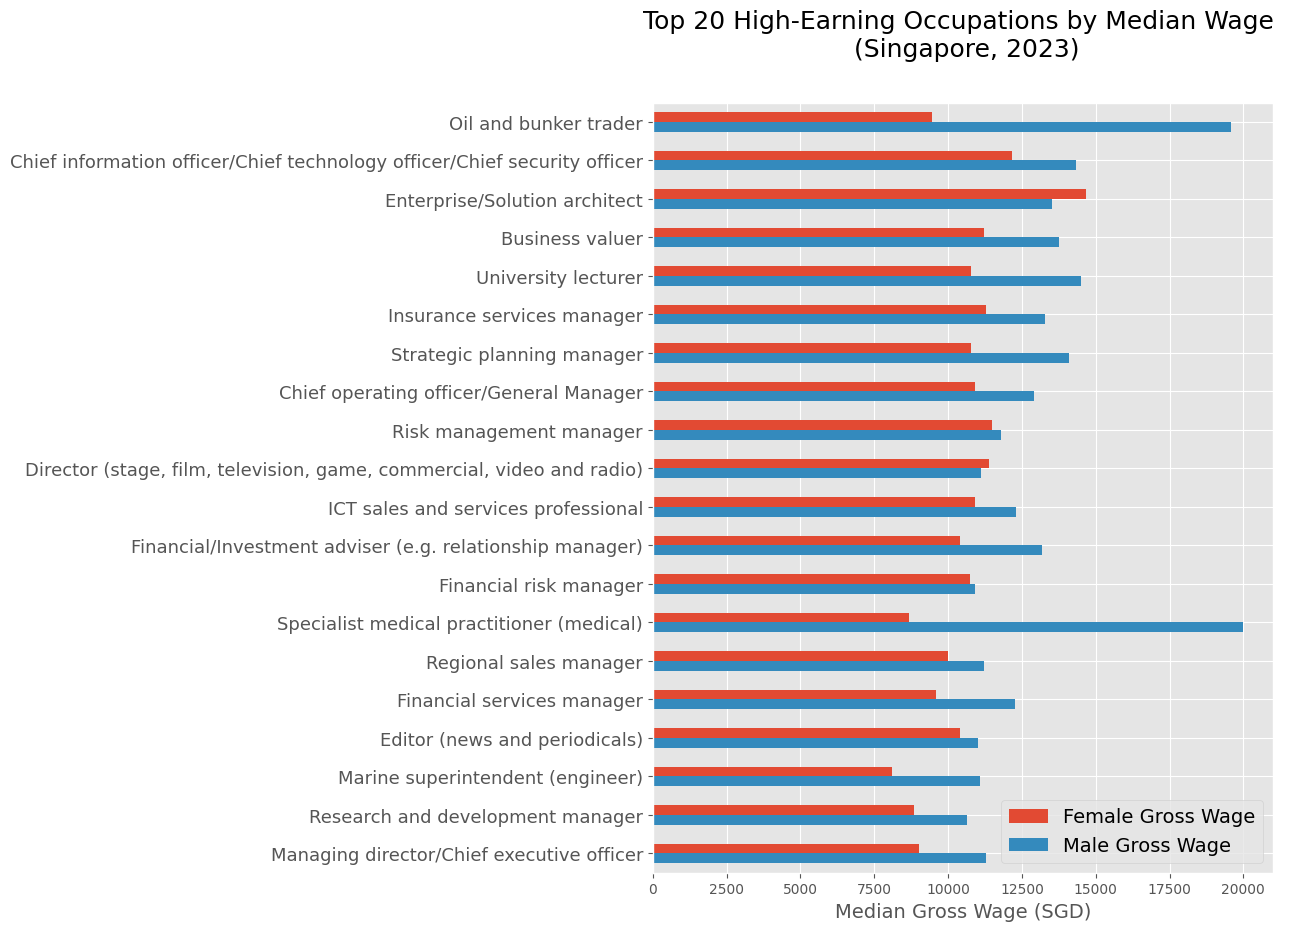

In [23]:
# plot a stacked horizontal bar chart of 'Male Gross Wage' and 'Female Gross Wage' by Occupation and show the top 20
df_merged.sort_values(by='Gross Wage', ascending=False).head(20).plot(
    kind='barh', x='Occupation', y=['Female Gross Wage', 'Male Gross Wage'],
    figsize=(8, 10))

# reverse y axis
plt.gca().invert_yaxis()

# add legend
plt.legend(loc='lower right', fontsize=14)

# add labels
plt.xlabel('Median Gross Wage (SGD)', fontsize=14)
# plt.ylabel('Occupation', fontsize=14)

# remove y label
plt.ylabel('')

# change y ticks fontsize
plt.yticks(fontsize=13)

# add a title
plt.title('Top 20 High-Earning Occupations by Median Wage \n (Singapore, 2023)', y=1.05, fontsize=18)


####Gender Gap of the Top Earning Occupations

Text(0.5, 1.05, 'Top 20 High-Earning Occupations by Gender Gap \n (Singapore, 2023)')

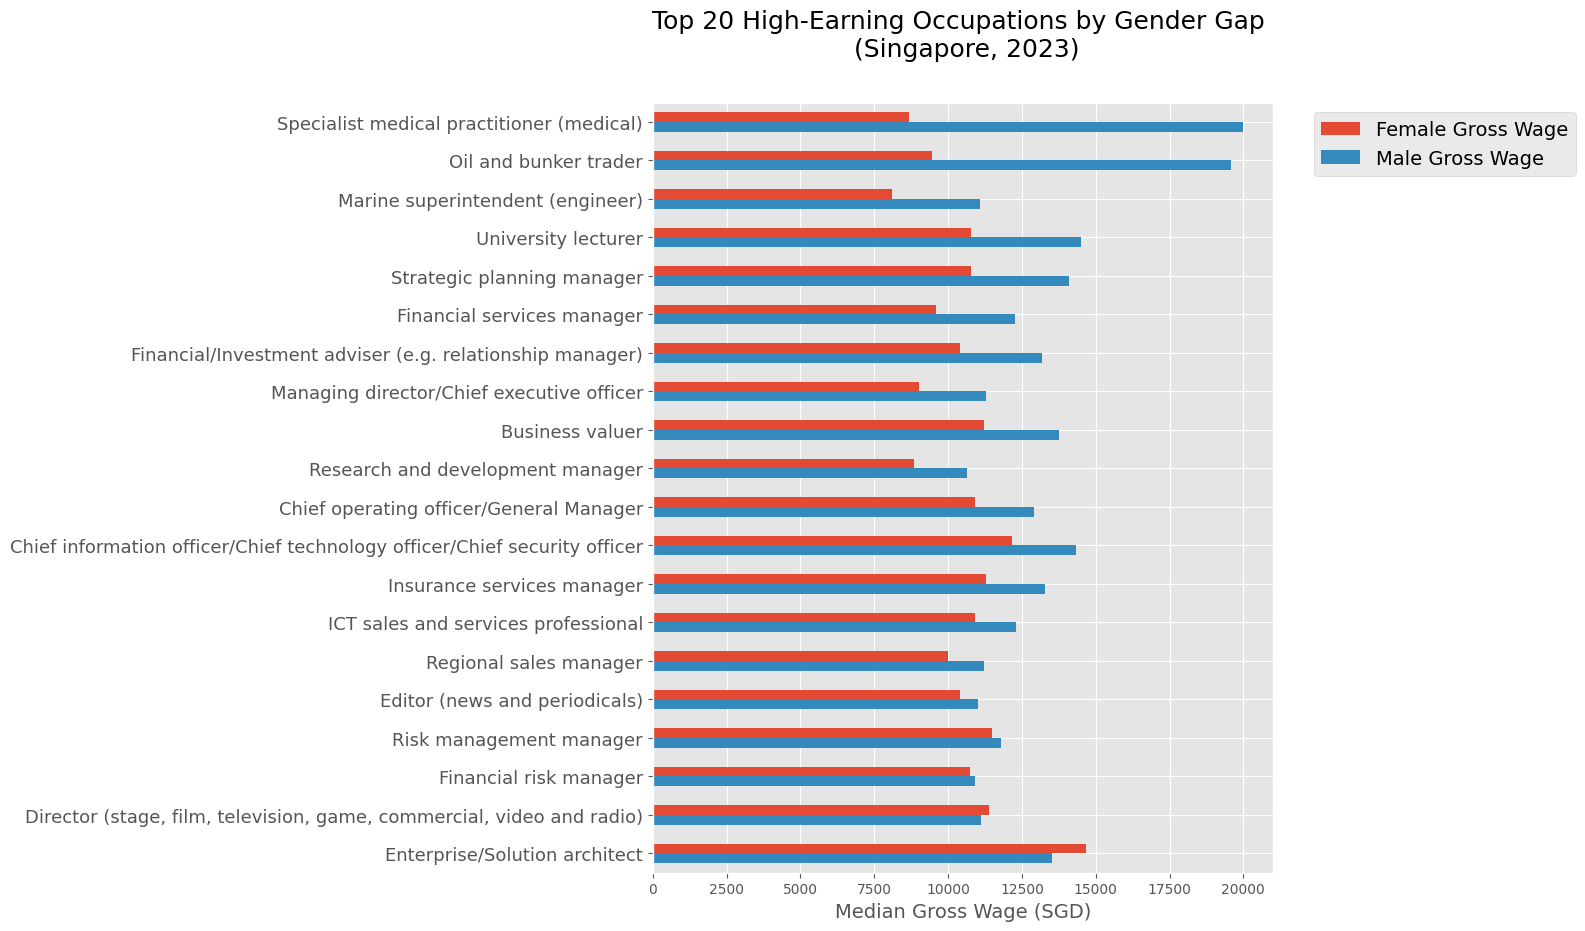

In [26]:
LIST_TOP_20_EARN = df_merged.sort_values(by='Gross Wage', ascending=False).head(20).Occupation.to_list()
# LIST_TOP_20_EARN
df_merged[df_merged['Occupation'].isin(LIST_TOP_20_EARN)].sort_values(by='Gender Wage Gap', ascending=False).plot(
    kind='barh', x='Occupation', y=['Female Gross Wage', 'Male Gross Wage'],
    figsize=(8, 10))

# reverse y axis
plt.gca().invert_yaxis()

# add legend
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=14)

# add x label
plt.xlabel('Median Gross Wage (SGD)', fontsize=14)
# plt.ylabel('Occupation', fontsize=14)

# remove y label
plt.ylabel('')

# update y ticks fontsize
plt.yticks(fontsize=13)

# add a title
plt.title('Top 20 High-Earning Occupations by Gender Gap \n (Singapore, 2023)', y=1.05, fontsize=18)

###The Gender Pay Gap Over 20 Years

Data Source: MINISTRY OF MANPOWER, Singapore

[Link to download data](https://tablebuilder.singstat.gov.sg/table/TS/M920131).

In [10]:
# load the raw df
df_pay_gap = pd.read_csv(PATH2DATA_PAY_GAP)

df_pay_gap.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Theme: Economy & Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Labour, Employment, Wages and Product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Wages and Income from Employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Median Gross Monthly Income From ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# keep rows from 9 to 25
df_pay_gap_clean = df_pay_gap.iloc[9:26, :]

# change header
df_pay_gap_clean.columns = df_pay_gap_clean.iloc[0].astype(str).str[:4]

# only keep row 1 and 2
df_pay_gap_clean = df_pay_gap_clean.iloc[1:3, :]

# transpose df and reset index
df_pay_gap_clean = df_pay_gap_clean.transpose().reset_index()

# name the columns
df_pay_gap_clean.columns = ['Year', 'Managers & Administrators - Male', 'Managers & Administrators - Female']

# drop the first row
df_pay_gap_clean = df_pay_gap_clean.drop(df_pay_gap_clean.index[0])

# convert 'Year' to integer
df_pay_gap_clean['Year'] = df_pay_gap_clean['Year'].astype(int)

# keep years from 2004 to 2023
df_pay_gap_clean = df_pay_gap_clean[df_pay_gap_clean['Year'].isin(range(2004, 2024))]

# sort 'Year' in ascending order
df_pay_gap_clean = df_pay_gap_clean.sort_values(by='Year')

# create a new column and calculate the gender gap
df_pay_gap_clean['Gender Gap'] = (
    df_pay_gap_clean['Managers & Administrators - Male'] - df_pay_gap_clean['Managers & Administrators - Female']
)/df_pay_gap_clean['Managers & Administrators - Male']

df_pay_gap_clean.head()

,Year,Managers & Administrators - Male,Managers & Administrators - Female,Gender Gap
18,2004,4896.0,4896.0,0.0
17,2007,5400.0,5085.0,0.058333
16,2008,6000.0,5769.0,0.0385
15,2009,5934.0,5353.0,0.09791
14,2010,6081.0,5582.0,0.082059


Text(0.5, 1.05, 'Gender Pay Gap Over 20 Years \n (Singapore, 2004-2023)')

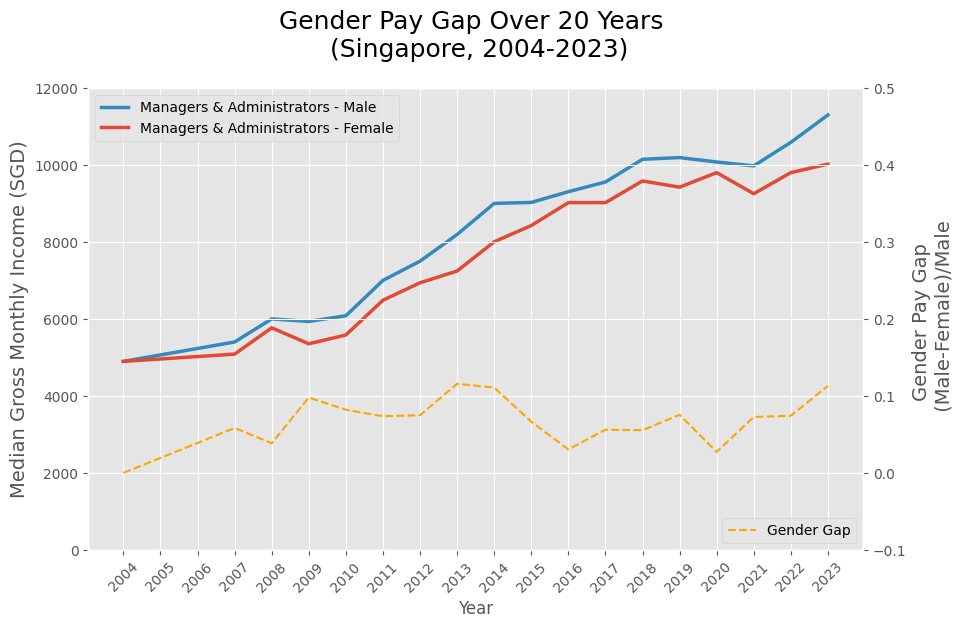

In [47]:
# plot a line chart for 'Managers & Administrators - Male'
ax = df_pay_gap_clean.plot(
    kind='line', x='Year', y='Managers & Administrators - Male', color='#348ABD', linewidth=2.5,
    figsize=(10, 6))

# add a line chart for 'Managers & Administrators - Female
df_pay_gap_clean.plot(
    kind='line', x='Year', y='Managers & Administrators - Female', ax=ax, color='#E24A33', linewidth=2.5,
    figsize=(10, 6))

# add a line chart for 'Gender Gap' on the secondary axis
ax2 = ax.twinx()
df_pay_gap_clean.plot(
    kind='line', x='Year', y='Gender Gap', ax=ax2, color='orange', style='--',
    figsize=(10,6))

# add legend
ax.legend(loc='upper left')
ax2.legend(loc='lower right')

# set y lim
ax.set_ylim(0, 12000)
ax2.set_ylim(-0.1, 0.5)

# set x ticks for ax
ax.set_xticks(range(2004, 2024))

# rotate x ticks for ax
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# add y label for ax
ax.set_ylabel('Median Gross Monthly Income (SGD)', fontsize=14)
# add y label for ax2
ax2.set_ylabel('Gender Pay Gap \n (Male-Female)/Male', fontsize=14)

# add title
plt.title('Gender Pay Gap Over 20 Years \n (Singapore, 2004-2023)', y=1.05, fontsize=18)


###Labor Force Participation Rate (SG Female vs. Male)

Data Source: SINGSTAT (Singapore Department of Statistics)

[Link to download the data](https://tablebuilder.singstat.gov.sg/table/TS/M182201).

In [35]:
# load raw data
df_labor_sg = pd.read_csv(PATH2DATA_LABOR_SG)

df_labor_sg.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,Theme: Economy & Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Labour, Employment, Wages and Product...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Labour Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table Title: Resident Labour Force Participati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####longitudinal

In [36]:
# drop the non-numeric rows
df_labor_sg_clean = df_labor_sg.iloc[9:61]

# make the first column as the index
df_labor_sg_clean.set_index(df_labor_sg_clean.columns[0], inplace=True)

# conver the top row to integer and make it the header
df_labor_sg_clean.columns = df_labor_sg_clean.iloc[0].astype(int)

# drop the first row
df_labor_sg_clean = df_labor_sg_clean.drop(df_labor_sg_clean.index[0])

# keep index == '25 - 64 Years'
df_labor_sg_clean = df_labor_sg_clean.loc['  25 - 64 Years']

# transpose the dataframe and reset index
df_labor_sg_clean = df_labor_sg_clean.transpose().reset_index()

# rename columns
df_labor_sg_clean.columns = ['Year', 'Total Participation Rate', 'Male Participation Rate', 'Female Participation Rate']

# keep year from 2004 to 2023
df_labor_sg_clean = df_labor_sg_clean[df_labor_sg_clean['Year'].isin(range(2004, 2024))]

# sort by year in ascending order
df_labor_sg_clean = df_labor_sg_clean.sort_values(by='Year')

df_labor_sg_clean.head()

,Year,Total Participation Rate,Male Participation Rate,Female Participation Rate
19,2004,76.4,91.6,61.6
18,2005,76.6,90.5,63.0
17,2006,78.7,92.7,65.3
16,2007,79.2,93.0,66.0
15,2008,79.7,92.5,67.4


Text(0.5, 1.05, 'Labor Force Participation Rate \n (Singapore Female vs. Male, 2004-2023) ')

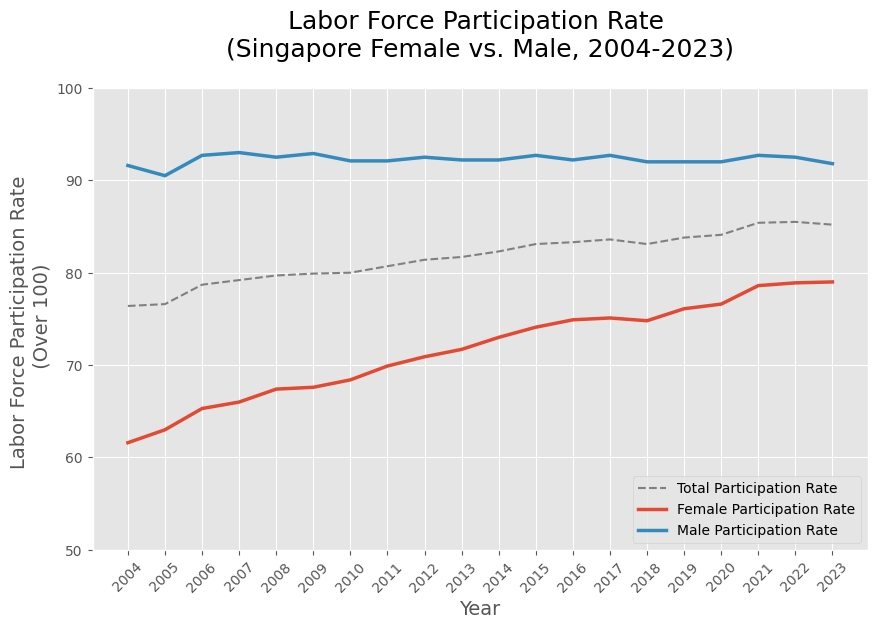

In [37]:
# plot a line chart for 'Total Participation Rate' vs 'Year', in dash line
ax = df_labor_sg_clean.plot(
    kind='line', x='Year', y='Total Participation Rate', style='--', color='grey',
    figsize=(10, 6))

# add a line chart for 'Female Participation Rate' vs 'Year'
df_labor_sg_clean.plot(
    kind='line', x='Year', y='Female Participation Rate', ax=ax, linewidth=2.5,
    figsize=(10, 6))

# add a line chart for 'Male Participation Rate' vs 'Year'
df_labor_sg_clean.plot(
    kind='line', x='Year', y='Male Participation Rate', ax=ax, linewidth=2.5,
    figsize=(10, 6))

# update y lim
plt.ylim(50, 100)

# show all x ticks from 2004 to 2023
plt.xticks(range(2004, 2024))
plt.xticks(rotation=45)

# move legends outside
plt.legend(loc='lower right')

# add labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Labor Force Participation Rate \n (Over 100)', fontsize=14)

# add a title
plt.title('Labor Force Participation Rate \n (Singapore Female vs. Male, 2004-2023) ', y=1.05, fontsize=18)

####cross-sectional

In [38]:
# drop the irrelevant rows
df_labor_sg_new = df_labor_sg.iloc[9:61]

# make the first column as the index
df_labor_sg_new.set_index(df_labor_sg_new.columns[0], inplace=True)

# conver the top row to integer and make it the header
df_labor_sg_new.columns = df_labor_sg_new.iloc[0].astype(int)

# drop the first row
df_labor_sg_new = df_labor_sg_new.drop(df_labor_sg_new.index[0])

# drop index within the list ['  65 Years & Over', '  15 - 24 Years', '  25 - 64 Years']
df_labor_sg_new = df_labor_sg_new.drop(index=['  65 Years & Over', '  15 - 24 Years', '  25 - 64 Years'])

# drop the index contains 'Participation Rate'
# df_labor_sg_new = df_labor_sg_new[~df_labor_sg_new.index.str.contains('Participation Rate')]

# reset index
df_labor_sg_new = df_labor_sg_new.reset_index()

# rename the first column to 'Year'
df_labor_sg_new.rename(columns={df_labor_sg_new.columns[0]: 'Age Band'}, inplace=True)

# reset index to the first column
df_labor_sg_new.set_index(df_labor_sg_new.columns[0], inplace=True)

# reset index
df_labor_sg_new = df_labor_sg_new.reset_index()

df_labor_sg_new.head()

Data Series,Age Band,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Total Resident Participation Rate,68.6,70.0,70.5,68.1,68.0,67.7,67.7,68.0,68.3,...,64.1,63.1,63.7,64.1,61.9,63.8,63.4,63.9,63.7,63.2
1,15 - 19 Years,15.7,15.8,15.7,13.8,15.1,15.2,14.2,15.3,15.8,...,16.1,13.5,15.5,18.8,16.8,21.6,23.7,27,28.5,25.1
2,20 - 24 Years,55.9,57.3,62.4,56.0,61.0,61.3,62.2,62.3,65.3,...,70.7,68.4,71.7,74.4,74,76.7,78.1,78.8,81,79.1
3,25 - 29 Years,88.5,89.3,90.4,90.4,90.1,90.0,90.2,90.3,90.3,...,87.1,86.8,87.5,87.4,85.5,86.4,85.7,86.1,85.2,84.8
4,30 - 34 Years,93.4,93.7,93.4,92.3,92.3,91.0,91.8,90.8,90.2,...,83.4,82.7,82.2,82,79,80.1,80,81,79.5,79


In [39]:
df_labor_sg_total = df_labor_sg_new.iloc[1:14, :]
df_labor_sg_male = df_labor_sg_new.iloc[15:28, :]
df_labor_sg_female = df_labor_sg_new.iloc[29:, :]

In [40]:
df_labor_sg_female.set_index('Age Band', inplace=True)
df_labor_sg_male.set_index('Age Band', inplace=True)
df_labor_sg_total.set_index('Age Band', inplace=True)

In [41]:
df_2004 = df_labor_sg_female[2004].to_frame().join(
    df_labor_sg_male[2004].to_frame(), lsuffix='_female', rsuffix='_male',
    )
df_2023 = df_labor_sg_female[2023].to_frame().join(
    df_labor_sg_male[2023].to_frame(), lsuffix='_female', rsuffix='_male',
    )

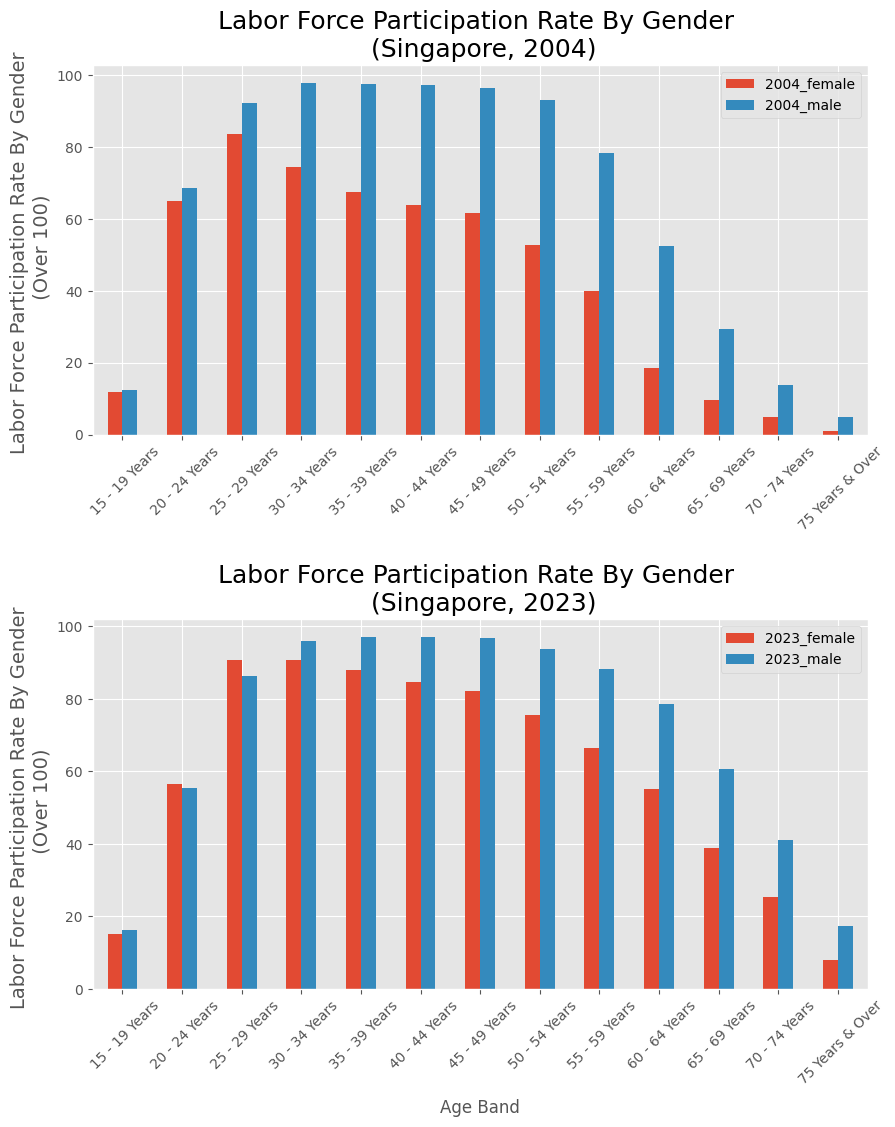

In [47]:
# create a 1*2 subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# plot df_2004 on the the first subplot
df_2004.plot(kind='bar', ax=axs[0], figsize=(10, 12))

# plot df_2023 on the second subplot
df_2023.plot(kind='bar', ax=axs[1], figsize=(10, 12))

# rotate x ticks for both plots by 45 degrees
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# add y label
axs[0].set_ylabel('Labor Force Participation Rate By Gender \n (Over 100)', fontsize=14)
axs[1].set_ylabel('Labor Force Participation Rate By Gender \n (Over 100)', fontsize=14)

# remove x label for axs[0]
axs[0].set_xlabel('')

# add titles
axs[0].set_title('Labor Force Participation Rate By Gender \n (Singapore, 2004)', fontsize=18)
axs[1].set_title('Labor Force Participation Rate By Gender \n (Singapore, 2023)', fontsize=18)

# add more space between subplots
plt.subplots_adjust(hspace=0.5)

###Labor Force Participation Rate (SG vs The World)

Data Source: International Labour Organization. “ILO Modelled Estimates and Projections database ( ILOEST )” ILOSTAT.

[Link to download the data](https://api.worldbank.org/v2/en/indicator/SL.TLF.CACT.ZS?downloadformat=csv).

In [4]:
# load raw data
df_labor_participation = pd.read_csv(PATH2DATA_LABOR_PARTICIPATION)

df_labor_participation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.NE.ZS,25.73,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.784,NaN,NaN,21.171,NaN,NaN,16.496,23.300,NaN,NaN
3,Africa Western and Central,AFW,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,53.455027,NaN,NaN,69.409514,NaN
4,Angola,AGO,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.NE.ZS,7.60,NaN,NaN,NaN,NaN,NaN,...,37.021,NaN,NaN,NaN,NaN,73.025000,NaN,74.725,NaN,NaN


In [5]:
# drop columns [1:3]
df_labor_world = df_labor_participation.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

# transpose the dataframe and reset the index
df_labor_world = df_labor_world.transpose().reset_index()

# make the first row as the header
df_labor_world.columns = df_labor_world.iloc[0]

# drop the first row
df_labor_world = df_labor_world.drop(df_labor_world.index[0])

# rename column 'Country Name' to 'Year'
df_labor_world.rename(columns={'Country Name': 'Year'}, inplace=True)

# convert year column to int type
df_labor_world['Year'] = df_labor_world['Year'].astype(int)

# filter by 'Year' and keep values from 2004 to 2023
df_labor_world = df_labor_world[df_labor_world['Year'].isin(range(2004, 2024))]

# create a new column and calculate the average across all country
df_labor_world['World Average'] = df_labor_world.iloc[:, 1:].mean(axis=1)

df_labor_world.head()

,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,World Average
45,2004,NaN,NaN,NaN,NaN,62.68,27.28,NaN,NaN,NaN,...,67.6,NaN,NaN,NaN,25.2,9.6,48.31,NaN,77.46,49.227323
46,2005,NaN,NaN,NaN,NaN,NaN,27.3,NaN,NaN,37.77,...,NaN,NaN,NaN,NaN,29.7,10.8,50.365,NaN,NaN,48.554997
47,2006,NaN,NaN,NaN,NaN,NaN,27.31,NaN,NaN,NaN,...,NaN,73.961,NaN,33.38,30.6,10.6,51.873,NaN,NaN,47.99277
48,2007,59.45,NaN,NaN,NaN,NaN,36.727,NaN,20.493375,NaN,...,70.534,NaN,NaN,NaN,28.3,10.4,50.781,NaN,NaN,48.068275
49,2008,NaN,NaN,43.79,NaN,NaN,45.657,NaN,21.216891,41.82,...,NaN,NaN,NaN,NaN,26.1,10.2,47.932,NaN,NaN,48.300562


Text(0.5, 1.05, 'Labor Force Participation Rate of Women \n (Singapore vs. World, 2004-2023)')

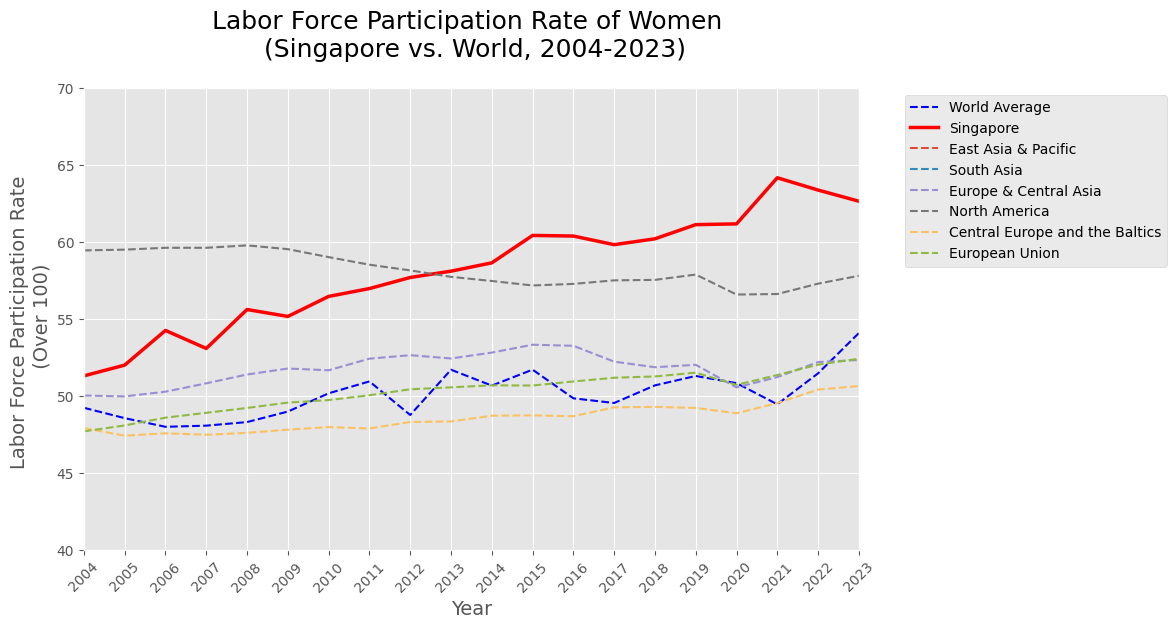

In [6]:
# missing data: 'Middle East & North Africa', 'Latin America & Caribbean', 'Sub-Saharan Africa'

# plot a line chart for 'World Average' in dash line
ax = df_labor_world.plot(
    kind='line', x='Year', y='World Average', style='--', color='blue',
    figsize=(10, 6))

# add a solid line for 'Singapore' in red and thicker linewidth
df_labor_world.plot(
    kind='line', x='Year', y='Singapore', ax=ax, linewidth=2.5, color='red',
    figsize=(10, 6))

# add a dash line for ['East Asia & Pacific', 'South Asia', 'Europe & Central Asia', 'North America', 'Central Europe and the Baltics', 'European Union']
df_labor_world.plot(
    kind='line', x='Year', y=['East Asia & Pacific', 'South Asia', 'Europe & Central Asia', 'North America', 'Central Europe and the Baltics', 'European Union'],
    ax=ax, style='--', figsize=(10, 6))

# show all x ticks from 2004 to 2023
plt.xticks(range(2004, 2024))
plt.xticks(rotation=45)

# edit x lim and y lim
plt.xlim(2004, 2023)
plt.ylim(40, 70)

# move legend outside
plt.legend(bbox_to_anchor=(1.05, 1))

# add labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Labor Force Participation Rate \n (Over 100)', fontsize=14)

# add a title
plt.title('Labor Force Participation Rate of Women \n (Singapore vs. World, 2004-2023)', y=1.05, fontsize=18)

###Educational Qualification

Data Source: SINGSTAT (Singapore Department of Statistics)

[Link to download the data](https://www.singstat.gov.sg/publications/reference/ebook/population/education-and-literacy).

In [118]:
# load raw data
df_education = pd.read_csv(PATH2DATA_EDUCATION)

df_education.head()

,DataSeries,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Total,3100900,3085300,2978300,2977800,2922700,2877000,2846000,2795200,2750900,...,2067300,2020800,1969700,1916400,1860900,1816800,1768400,1730600,1679300,1622300
1,25 - 29 Years,238000,215400,254800,268900,252300,251800,242300,253000,232800,...,251500,242200,248300,240700,239900,256100,255300,271400,272100,281500
2,30 - 34 Years,307600,305500,325600,296000,273200,263800,262300,268200,269900,...,293400,290000,293000,298200,292400,291000,283400,292200,288300,292700
3,35 - 39 Years,298300,308600,310400,297800,296900,303400,305700,288900,300200,...,309900,307700,303400,305800,301200,291500,278300,266700,259900,252600
4,40 - 44 Years,313600,333100,309100,298100,304500,313100,320000,304000,315300,...,300300,299600,286200,278700,264400,248300,248900,232100,226500,203900


In [119]:
# filter by the 'DataSeries' column and keep rows contain 'Total'
df_education_clean = df_education[df_education['DataSeries'].str.contains('Total')]

# transpose df and reset index
df_education_clean = df_education_clean.transpose().reset_index()

# make the first row the headers
df_education_clean.columns = df_education_clean.iloc[0]

# drop the first row
df_education_clean = df_education_clean.drop(df_education_clean.index[0])

# rename 'DataSeries' to 'Year'
df_education_clean.rename(columns={'DataSeries': 'Year'}, inplace=True)

# convert 'Year' column to int type
df_education_clean['Year'] = df_education_clean['Year'].astype(int)

# filter by year and keep values from 2004 to 2023
df_education_clean = df_education_clean[df_education_clean['Year'].isin(range(2004, 2024))]

df_education_clean.head()

,Year,Total,Total - Below Secondary,Total- Secondary,Total - Post Secondary (Non-Tertiary),Total - Diploma & Professional Qualification,Total - University,Total Males,Total Males - Below Secondary,Total Males - Secondary,Total Males - Post Secondary (Non-Tertiary),Total Males - Diploma & Professional Qualification,Total Males - University,Total Females,Total Females - Below Secondary,Total Females - Secondary,Total Females - Post Secondary (Non-Tertiary),Total Females - Diploma & Professional Qualification,Total Females - University
1,2023,3100900,663000,479800,309300,514000,1134700,1475500,281000,216900,161300,255000,561200,1625400,382000,262900,148000,259000,573500
2,2022,3085300,646300,492200,308000,521900,1116900,1478800,276600,220800,160300,256800,564400,1606500,369800,271500,147700,265100,552400
3,2021,2978300,643900,492600,281300,486200,1074300,1430900,281200,211200,151300,247100,540100,1547300,362700,281300,130000,239000,534200
4,2020,2977800,757800,484300,296900,456800,982000,1412900,324400,215000,158100,230000,485400,1564900,433400,269300,138800,226700,496600
5,2019,2922700,745700,503700,265900,461200,946200,1394900,319200,220900,143600,235500,475700,1527800,426500,282800,122400,225700,470500


In [178]:
# subset dataframe with the selected columns
df_university = df_education_clean[[
    'Year', 'Total', 'Total - University',
    'Total Males', 'Total Males - University',
    'Total Females', 'Total Females - University'
]]

# change df to int type
df_university = df_university.astype(int)

# create a new column and calculate the percentage of people went to univerisity
df_university['Total % University'] = df_university['Total - University'] / df_university['Total']
df_university['Males % University'] = df_university['Total Males - University'] / df_university['Total Males']
df_university['Females % University'] = df_university['Total Females - University'] / df_university['Total Females']

# calculate the gender difference
df_university['Gender Difference'] = df_university['Males % University'] - df_university['Females % University']

df_university.head()

,Year,Total,Total - University,Total Males,Total Males - University,Total Females,Total Females - University,Total % University,Males % University,Females % University,Gender Difference
1,2023,3100900,1134700,1475500,561200,1625400,573500,0.365926,0.380346,0.352836,0.027509
2,2022,3085300,1116900,1478800,564400,1606500,552400,0.362007,0.381661,0.343853,0.037808
3,2021,2978300,1074300,1430900,540100,1547300,534200,0.360709,0.377455,0.345247,0.032208
4,2020,2977800,982000,1412900,485400,1564900,496600,0.329774,0.343549,0.317337,0.026212
5,2019,2922700,946200,1394900,475700,1527800,470500,0.323742,0.341028,0.307959,0.033069


Text(0.5, 1.05, 'Percentage of Population Attained University Degree \n (Singapore, 2004-2023)')

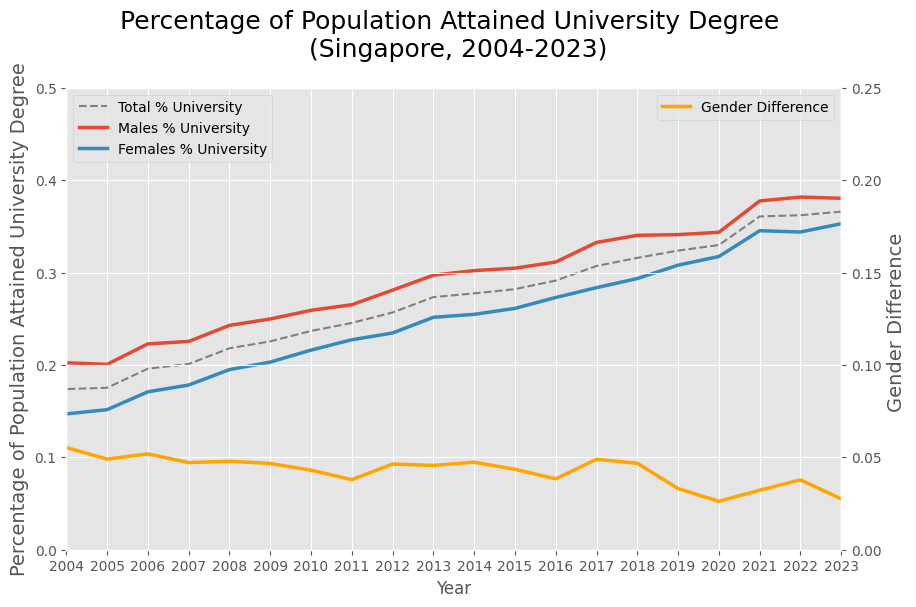

In [180]:
# plot a line chart for 'Total % University' by 'Year'
ax = df_university.plot(
    kind='line', x='Year', y='Total % University', style='--', color='grey',
    figsize=(10, 6))

# add a line for 'Males % University'
ax1 = df_university.plot(
    kind='line', x='Year', y='Males % University', ax=ax, linewidth=2.5,
    figsize=(10, 6))

# add another line for 'Females % University'
ax2 = df_university.plot(
    kind='line', x='Year', y='Females % University', ax=ax, linewidth=2.5,
    figsize=(10, 6))

# plot 'Gender Difference' on the secondary axis
ax3 = ax.twinx()
df_university.plot(
    kind='line', x='Year', y='Gender Difference', ax=ax3, linewidth=2.5, color='orange',
    figsize=(10, 6))

# add x ticks from 2004 to 2023
plt.xticks(range(2004, 2024))

# edit x lim
plt.xlim(2004, 2023)

# reset the y lim for ax
ax.set_ylim(0.0, 0.5)

# reset the y lim for ax3
ax3.set_ylim(0, 0.25)

# add legend for ax
ax.legend(loc='upper left')

# add legend for ax3
ax3.legend(loc='upper right')

# add labels
plt.xlabel('Year', fontsize=14)

# add y label for primary y axis
ax.set_ylabel('Percentage of Population Attained University Degree', fontsize=14)

# add y label for secondary y axis
ax3.set_ylabel('Gender Difference ', fontsize=14)

# rotate x ticks by 45 degrees
plt.xticks(rotation=45)


# add a title
plt.title('Percentage of Population Attained University Degree \n (Singapore, 2004-2023)', y=1.05, fontsize=18)

In [144]:
df_university[df_university['Year'] == 2004]['Gender Difference']

,Gender Difference
20,0.055322


In [143]:
df_university[df_university['Year'] == 2023]['Gender Difference']

,Gender Difference
1,0.027509


In [146]:
(0.055322-0.027509)/0.055322

0.5027475507031561

###Field of Study

Data Source: SINGSTAT (Singapore Department of Statistics)


[Link to download the data](https://tablebuilder.singstat.gov.sg/table/TS/M850761).

In [122]:
# load raw data
df_study = pd.read_csv(PATH2DATA_UNI_INTAKE)

df_study.head()

,Theme: Population,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Subject: Education, Language Spoken and Literacy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Topic: Intake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Table Title: Number Of Full-Time University St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data last updated: 25/06/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# drop the irrelevant rows
df_study_clean = df_study.iloc[8:57, :]

# make the first column the index
df_study_clean.set_index(df_study_clean.columns[0], inplace=True)

# convert the values to integer
df_study_clean = df_study_clean.astype(int)

# make the first row the header
df_study_clean.columns = df_study_clean.iloc[0]

# drop the first row
df_study_clean = df_study_clean.drop(df_study_clean.index[0])

df_study_clean.head()

Data Series,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
Theme: Population,,,,,,,,,,,,
Total Intake,20349,21307,20976,20713,20041,18668,18552,18126,17870,17251,16199,15566
Accountancy,1172,1356,1368,1433,1421,1508,1521,1470,1515,1185,1213,1100
"Architecture, Building & Real Estate",338,430,483,492,458,410,419,419,470,404,395,475
Business & Administration,3518,3483,3378,3110,2785,2393,2196,2120,1902,1780,1732,1637
Dentistry,80,81,72,60,60,54,54,54,54,54,53,48


In [124]:
df_study_total = df_study_clean.iloc[1:16, :]
df_study_male = df_study_clean.iloc[17:32, :]
df_study_female = df_study_clean.iloc[33:, :]

In [125]:
# calculate percentage for female
df_study_female_perc = df_study_female/df_study_total
# df_study_female_perc

In [126]:
# calculate percentage for male
df_study_male_perc = df_study_male/df_study_total
# df_study_male_perc

In [129]:
df_2022 = df_study_male_perc[2022].to_frame().join(df_study_female_perc[2022].to_frame(), lsuffix='_male', rsuffix='_female')
df_2011 = df_study_male_perc[2011].to_frame().join(df_study_female_perc[2011].to_frame(), lsuffix='_male', rsuffix='_female')

In [130]:
df_2022['2022_male'] = df_2022['2022_male']*-1
df_2011['2011_male'] = df_2011['2011_male']*-1

Text(0.5, 1.0, 'University Intake by Gender and Field of Study \n (Singapore, 2011)')

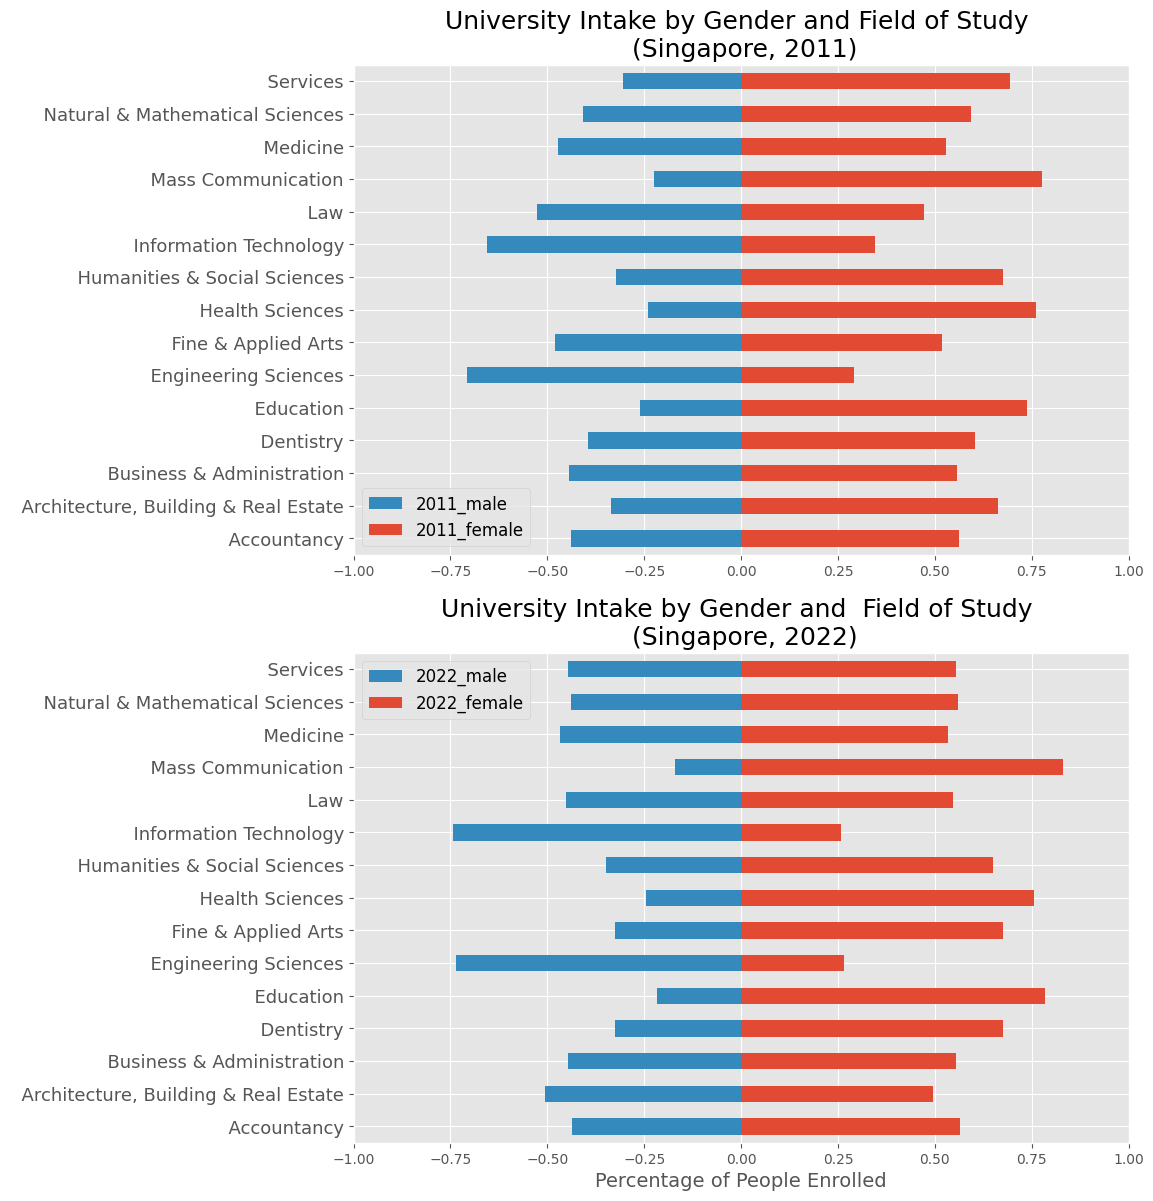

In [131]:
# create a 2*1 subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 14))

df_2022['2022_male'].plot(kind='barh', ax=axs[1], align='center', color='#348ABD')
df_2022['2022_female'].plot(kind='barh', ax=axs[1], align='center', color='#E24A33')

df_2011['2011_male'].plot(kind='barh', ax=axs[0], align='center', zorder=10, color='#348ABD')
df_2011['2011_female'].plot(kind='barh', ax=axs[0], align='center', zorder=10, color='#E24A33')

# add legend
axs[0].legend(loc='lower left', fontsize=12) #bbox_to_anchor=(1.25, 1))
axs[1].legend(loc='upper left', fontsize=12) #bbox_to_anchor=(1.25, 1))

# drop y label
axs[0].set_ylabel('')
axs[1].set_ylabel('')

# increase fontsize for y ticks
axs[0].tick_params(axis='y', labelsize=13)
axs[1].tick_params(axis='y', labelsize=13)

# add x label for axs[1]
axs[1].set_xlabel('Percentage of People Enrolled', fontsize=14)

# set x lim for both axis
axs[0].set_xlim(-1, 1)
axs[1].set_xlim(-1, 1)

# add titles
axs[1].set_title('University Intake by Gender and  Field of Study \n (Singapore, 2022)', fontsize=18)
axs[0].set_title('University Intake by Gender and Field of Study \n (Singapore, 2011)', fontsize=18)